In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
file_path = "online_retail_II.xlsx"
xls = pd.ExcelFile(file_path)

# Load 2010-2011 data
df = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Display dataset structure
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Checking missing values
missing_values = df.isnull().sum()

# Removing rows with missing Customer IDs
df_cleaned = df.dropna(subset=['Customer ID']).copy()  # Use .copy() to avoid SettingWithCopyWarning

# Filling missing Product Descriptions safely
df_cleaned.loc[:, 'Description'] = df_cleaned['Description'].fillna("Unknown Product")

In [5]:
# Removing transactions with negative or zero Quantity and Price
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['Price'] > 0)]

In [6]:
# Removing duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

In [7]:
# Set thresholds for outliers using the 99th percentile
quantity_threshold = df_cleaned['Quantity'].quantile(0.99)
price_threshold = df_cleaned['Price'].quantile(0.99)

# Filter out extreme outliers
df_cleaned = df_cleaned[(df_cleaned['Quantity'] <= quantity_threshold) & (df_cleaned['Price'] <= price_threshold)]

In [8]:
# Converting InvoiceDate to a standard format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [9]:
# Save the cleaned data to a new file
df_cleaned.to_excel("cleaned_online_retail_II.xlsx", index=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


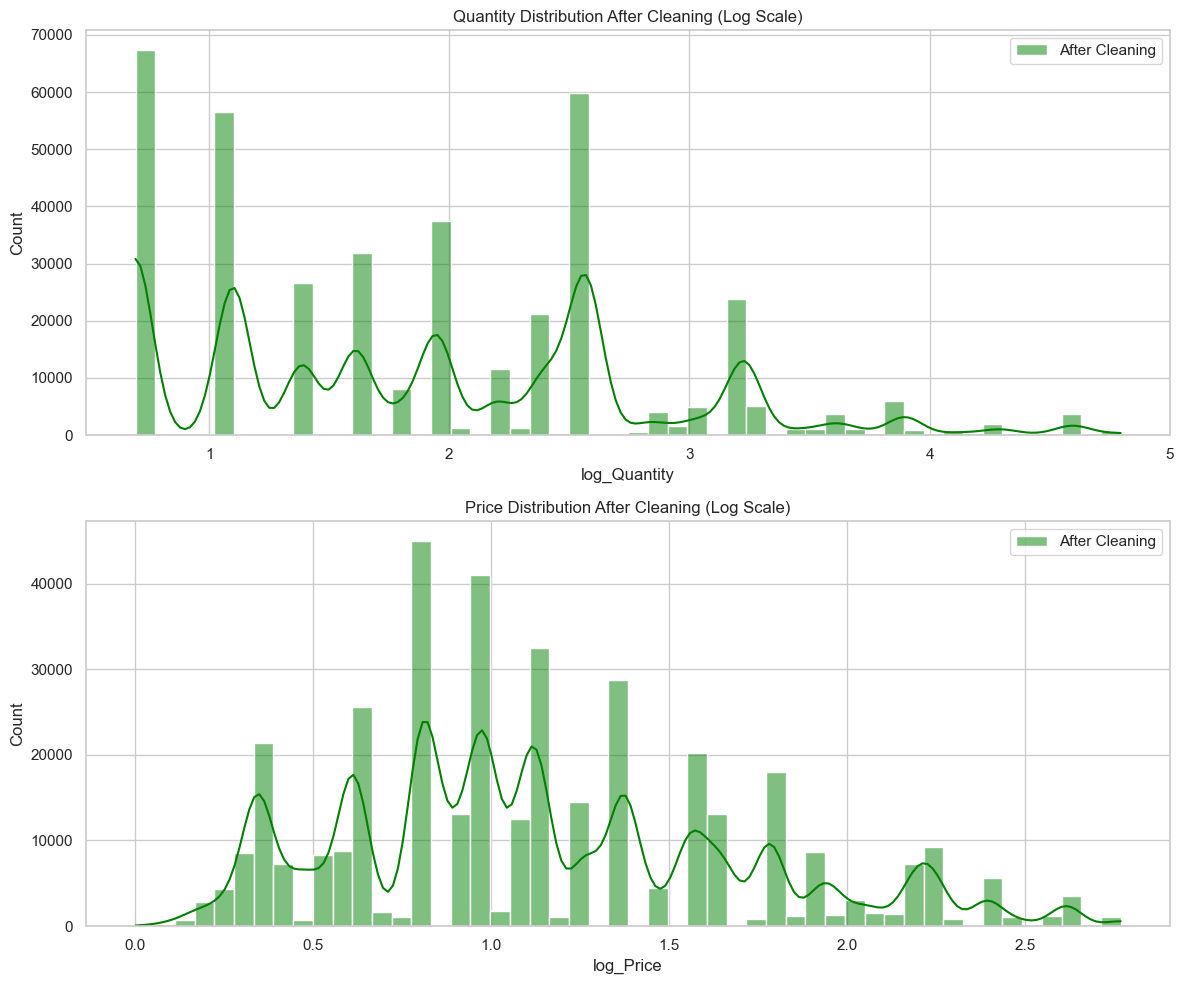

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create a figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Quantity Distribution After Cleaning (Log Scale)
sns.histplot(df_cleaned['log_Quantity'], bins=50, kde=True, color="green", label="After Cleaning", ax=axes[0])
axes[0].set_title("Quantity Distribution After Cleaning (Log Scale)")
axes[0].legend()

# Price Distribution After Cleaning (Log Scale)
sns.histplot(df_cleaned['log_Price'], bins=50, kde=True, color="green", label="After Cleaning", ax=axes[1])
axes[1].set_title("Price Distribution After Cleaning (Log Scale)")
axes[1].legend()

plt.tight_layout()
plt.show()